In [71]:
#Step (1): Read Data
import pandas as pd #Read data
import numpy as np  #Array

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_train = pd.read_excel("train_processed.xlsx")
data_test = pd.read_excel("01test.xlsx")
data_out = pd.read_excel("01test.xlsx")
data_train.head() # Show data (看看是否讀取成功)

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
0,-2.600452,-2.833071,-3.553067,-0.984729,-0.820966,-5.324059,3,-0.741141,3.593824,-1.395510,-1.225014,-0.494159,0.750427,-1.955921,0
1,-2.606880,-2.838397,-3.544191,-0.984776,2.337184,-5.283197,4,-0.603315,4.295257,-1.395792,-1.225314,-0.494159,0.479721,-1.463128,1
2,-2.628558,-2.857238,-3.556987,-0.984526,0.042620,-5.313652,3,-0.286121,3.844972,-1.395733,-1.225263,-0.494159,0.754607,-1.955921,0
3,-2.627114,-2.852910,-3.541104,-0.984609,-0.586660,-5.333278,3,-0.070108,3.763350,-1.395879,-1.225406,-0.494159,0.306494,-1.955921,1
4,-2.618020,-2.845929,-3.547520,-0.984577,-0.669485,-5.323154,3,-0.448527,3.619669,-1.395727,-1.225276,-0.494159,0.237039,-1.955921,0


In [72]:
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


In [73]:
# Appendix: Data preprocessing (程式供參考用)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件

name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 10

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#正規化
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized

#data_train=outlier_del(data_train,name_list_outlier)
data_train.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,-2.620272,-2.849565,-3.547868,-0.984604,0.024193,-5.305197,3.300447,-0.364524,3.786543,-1.395746,-1.225267,-0.387907,0.004648,-1.807863,0.429098
std,0.014543,0.013843,0.008447,0.000192,1.054608,0.018987,0.673344,0.614209,0.457693,0.000110,0.000113,0.201416,0.953273,0.331819,0.495012
min,-2.651326,-2.882784,-3.577383,-0.984806,-1.000782,-5.342180,3.000000,-1.076193,-0.072659,-1.395901,-1.225406,-0.494159,-4.469358,-1.955921,0.000000
25%,-2.630685,-2.858999,-3.552881,-0.984732,-0.866802,-5.322004,3.000000,-0.708705,3.525731,-1.395843,-1.225370,-0.494159,-0.321245,-1.955921,0.000000
50%,-2.620425,-2.848114,-3.547182,-0.984670,-0.350019,-5.303272,3.000000,-0.526822,3.751017,-1.395763,-1.225286,-0.494159,0.407399,-1.955921,0.000000
75%,-2.609117,-2.838736,-3.542608,-0.984539,0.691202,-5.289773,3.000000,-0.134930,4.017546,-1.395664,-1.225187,-0.145699,0.682794,-1.955921,1.000000
max,-2.583622,-2.819068,-3.508293,-0.983707,3.402716,-5.271529,6.000000,10.810466,8.133688,-1.395374,-1.224878,1.248144,0.754607,-0.477541,1.000000


c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from current font.
  fig.canvas.draw()
c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.draw()
c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 34722 (\N{CJK UNIFIED IDEOGRAPH-87A2}) missing from current font.
  fig.canvas.draw()
c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24149 (\N{CJK UNIFIED IDEOGRAPH-5E55}) missing from current font.
  fig.canvas.draw()
c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 28331 (\N{CJK UNIFIED IDEOGRAPH-6EAB}) missing from current font.
  fig.canvas.draw()
c:\Users\user\Desktop\testing\mkenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24230 

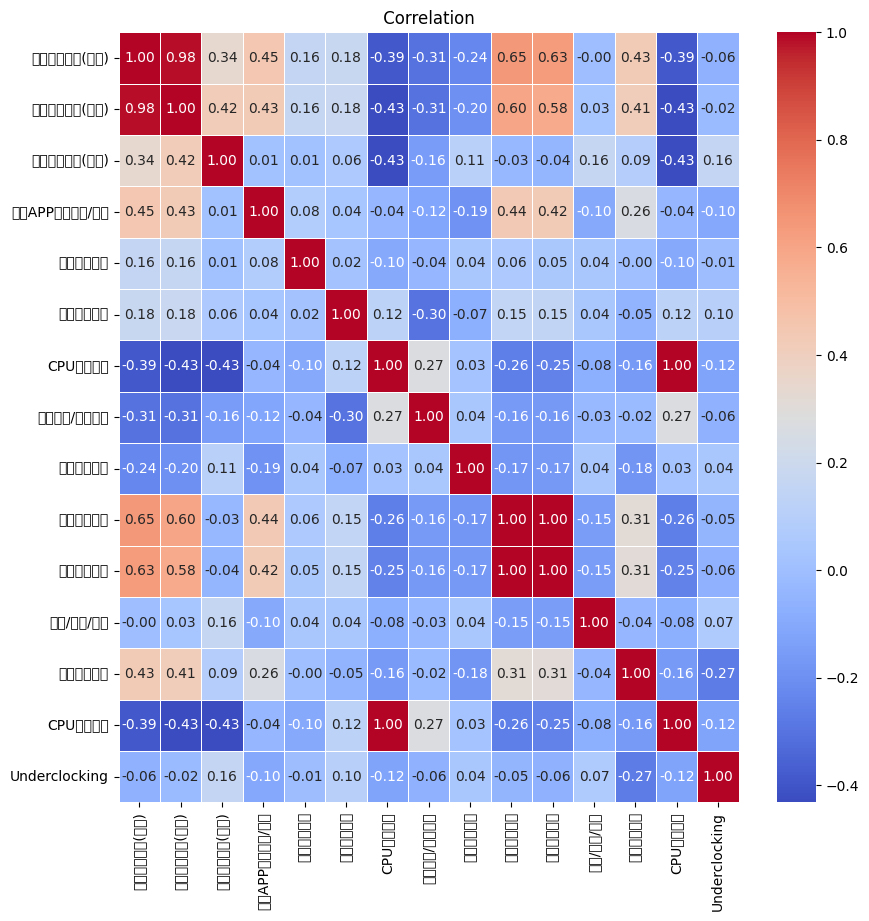

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()
    
corr_matrix_graph(data_train)

In [75]:

#Step (3): 用X儲存features, Y為labels(Underclocking)
y_data = data_train['Underclocking'].to_numpy()
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
x_data = data_train[feature_ex].to_numpy()



def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 


[[ 1.36300652 -0.61562149 -0.80150167 ...  2.1330885   2.23749711
   0.78243834]
 [ 0.92099655  0.43536847  2.19351346 ... -0.41610788 -0.41100958
   0.49842579]
 [-0.56981449 -1.07962976  0.01747584 ...  0.11219075  0.03672694
   0.78682338]
 ...
 [-1.36665061 -0.72751934  0.16482193 ... -1.3547237  -1.2284996
   0.1461305 ]
 [ 0.10900786  0.42781419  0.39875095 ...  0.62857951  0.63988476
  -0.78380936]
 [ 1.30898308  0.16152563 -0.86666265 ...  1.44250353  1.55050655
   0.32371546]]
[0 1 0 ... 0 0 0]


In [76]:

# 使用 SMOTENC 进行过采样处理
from imblearn.over_sampling import SMOTENC

from collections import Counter
from imblearn.under_sampling import TomekLinks
print('Original dataset shape %s' % Counter(y_data))
tl = TomekLinks()
x_data, y_data = tl.fit_resample(x_data, y_data)
print('Resampled dataset shape %s' % Counter(y_data))


# 这里我们假设所有的特征都是数值型，如果有分类特征，请指定它们的索引
categorical_features = [4]  # 假设 'CPU跑分階級' 是分类特征

smotenc = SMOTENC( categorical_features=categorical_features,random_state=42)
x_data, y_data = smotenc.fit_resample(x_data, y_data)
print('After SMOTENC dataset shape %s' % Counter(y_data))


from collections import Counter
from imblearn.under_sampling import TomekLinks
print('Original dataset shape %s' % Counter(y_data))
tl = TomekLinks()
x_data, y_data = tl.fit_resample(x_data, y_data)
print('Resampled dataset shape %s' % Counter(y_data))



Original dataset shape Counter({0: 2170, 1: 1631})
Resampled dataset shape Counter({0: 1822, 1: 1631})
After SMOTENC dataset shape Counter({0: 1822, 1: 1822})
Original dataset shape Counter({0: 1822, 1: 1822})
Resampled dataset shape Counter({0: 1822, 1: 1741})


In [77]:
#Step (4): 把dataset分成訓練跟驗證
from sklearn.model_selection import train_test_split
#test_size=0.3 為比例-> training:test=7:3
trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

In [78]:

# Read in dataset (encoding = 'Big5'可顯示出繁體中文)
data_test = pd.read_excel("01test.xlsx")
data_test.head() # Show data (看看是否讀取成功)
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']	
test_id=data_test.pop('id')
x_test = data_test[feature_ex].to_numpy()
x_test=data_normalized(x_test)
x_test=data_standardized(x_test)
x_test=data_normalized(x_test)
x_test=data_standardized(x_test)

In [79]:
#predicted_ans=xgboostModel.predict(x_test)
#my_submission=pd.DataFrame({'id':test_id,'Underclocking':predicted_ans})
#my_submission.to_csv('submission_7774_7670.csv',index=False)

In [80]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=3333 min_samples_leaf=2,min_samples_split=10,max_depth=7,oob_score=True,random_state=42,n_jobs=-1)

# 定义 KFold 交叉验证对象
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 使用 cross_validate 进行交叉验证
cv_results = cross_validate(rf_model, x_data, y_data, cv=kfold, scoring='accuracy', return_train_score=True)

# 输出每个 fold 的训练得分和验证得分
for i in range(5):
    train_score = cv_results['train_score'][i]
    test_score = cv_results['test_score'][i]
    print(f"Fold {i+1} - Training Score: {train_score}, Validation Score: {test_score}")

# 输出平均训练得分和平均验证得分
mean_train_score = np.mean(cv_results['train_score'])
mean_test_score = np.mean(cv_results['test_score'])
print(f"\nMean Training Score: {mean_train_score}")
print(f"Mean Validation Score: {mean_test_score}")

Fold 1 - Training Score: 0.8024561403508772, Validation Score: 0.7349228611500701
Fold 2 - Training Score: 0.8021052631578948, Validation Score: 0.7727910238429172
Fold 3 - Training Score: 0.8056140350877193, Validation Score: 0.7545582047685835
Fold 4 - Training Score: 0.8067344791301297, Validation Score: 0.7050561797752809
Fold 5 - Training Score: 0.8116450368291828, Validation Score: 0.7162921348314607

Mean Training Score: 0.8057109909111608
Mean Validation Score: 0.7367240808736625
